<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Natural_Language_Processing/Text_Classification_with_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Embedding, LSTM, MaxPooling1D, Conv1D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-07-18 18:29:31--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.2’

spam.csv.2          100%[===================>] 491.86K  --.-KB/s    in 0.1s    

2022-07-18 18:29:31 (4.57 MB/s) - ‘spam.csv.2’ saved [503663/503663]



In [32]:
df = pd.read_csv('spam.csv', encoding ='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis = 1)

In [34]:
df.columns = ['labels', 'data']
df['b_labels'] = df['labels'].map({'ham': 0, 'spam' :1})
Y = df['b_labels'].values
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df['data'], Y, test_size=0.33)

In [36]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [37]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.'% V)

Found 7109 unique tokens.


In [38]:
data_train = pad_sequences(sequences_train)
print('shape of data train tensor:', data_train.shape)
T = data_train.shape[1]

shape of data train tensor: (3733, 189)


In [39]:
data_test = pad_sequences(sequences_test, maxlen = T)
print('shape of data train tensor:', data_test.shape)


shape of data train tensor: (1839, 189)


In [40]:
D = 20

i = Input(shape=(T,))
x = Embedding(V+1, D)(i) # first index starts from 1 
x = Conv1D(32,3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3, activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)

In [41]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']

)

print('training model...')
r = model.fit(
    data_train,
    y_train,
    epochs = 10,
    validation_data = (data_test, y_test)
  
)

training model...
Epoch 1/10
117/117 [==============================] - 4s 31ms/step - loss: 0.3894 - accuracy: 0.8655 - val_loss: 0.2834 - val_accuracy: 0.8668
Epoch 2/10
117/117 [==============================] - 3s 22ms/step - loss: 0.1428 - accuracy: 0.9432 - val_loss: 0.0745 - val_accuracy: 0.9750
Epoch 3/10
117/117 [==============================] - 3s 27ms/step - loss: 0.0240 - accuracy: 0.9936 - val_loss: 0.0467 - val_accuracy: 0.9875
Epoch 4/10
117/117 [==============================] - 3s 28ms/step - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.0442 - val_accuracy: 0.9880
Epoch 5/10
117/117 [==============================] - 3s 27ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0433 - val_accuracy: 0.9875
Epoch 6/10
117/117 [==============================] - 3s 23ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0489 - val_accuracy: 0.9864
Epoch 7/10
117/117 [==============================] - 3s 22ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0449 - va

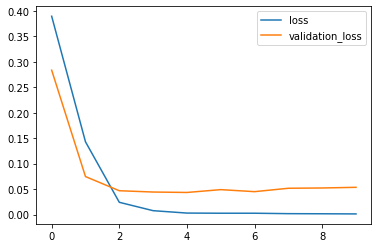

In [43]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'validation_loss')
plt.legend()

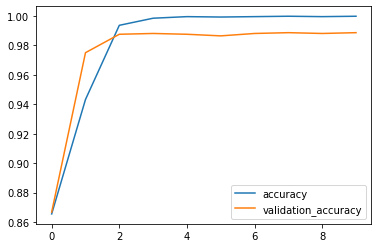

In [44]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()